<a href="https://colab.research.google.com/github/BAgaoglu/loan-prediction/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [ ]:
dftrain1 = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
dfeval = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
#dftrain.fillna(0)
#dfeval.fillna(0)
dftrain = dftrain.dropna()
dfeval = dfeval.dropna()


In [ ]:
dftrain.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [ ]:
y_train = dftrain.pop('LoanAmount')
y_eval = dfeval.pop('LoanAmount')

In [ ]:
dftrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,360.0,1.0,Urban,Y


In [ ]:
dftrain.describe()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,342.050000,0.854167
std,5668.251251,2617.692267,65.212401,0.353307
min,150.000000,0.000000,36.000000,0.000000
25%,2898.750000,0.000000,360.000000,1.000000
50%,3859.000000,1084.500000,360.000000,1.000000
75%,5852.500000,2253.250000,360.000000,1.000000
max,81000.000000,33837.000000,480.000000,1.000000


In [ ]:
dftrain.shape

(480, 12)

In [ ]:
y_train.head()

1    128.0
2     66.0
3    120.0
4    141.0
5    267.0
Name: LoanAmount, dtype: float64

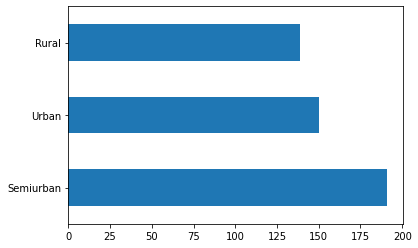

In [ ]:
dftrain.Property_Area.value_counts().plot(kind = 'barh')

Text(0.5, 0, '% LoanAmount')

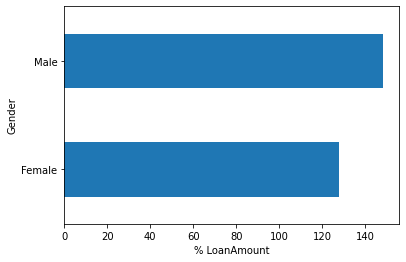

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('Gender').LoanAmount.mean().plot(kind='barh').set_xlabel('% LoanAmount')

In [ ]:
CATEGORICAL_COLUMNS = ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents'] #removed 'Loan_Status'

NUMERIC_COLUMNS = [ 'ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term', 'Credit_History' ]

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)
    

[VocabularyListCategoricalColumn(key='Loan_ID', vocabulary_list=('LP001003', 'LP001005', 'LP001006', 'LP001008', 'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020', 'LP001024', 'LP001028', 'LP001029', 'LP001030', 'LP001032', 'LP001036', 'LP001038', 'LP001043', 'LP001046', 'LP001047', 'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001095', 'LP001097', 'LP001098', 'LP001100', 'LP001112', 'LP001114', 'LP001116', 'LP001119', 'LP001120', 'LP001131', 'LP001138', 'LP001144', 'LP001146', 'LP001151', 'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186', 'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199', 'LP001205', 'LP001206', 'LP001207', 'LP001222', 'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241', 'LP001243', 'LP001245', 'LP001248', 'LP001253', 'LP001255', 'LP001256', 'LP001259', 'LP001263', 'LP001265', 'LP001267', 'LP001275', 'LP001279', 'LP001282', 'LP001289', 'LP001310', 'LP001316', 'LP001318', 'LP001319', 'LP001322', 'LP001325', 'LP001327', 'LP001333',

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=100, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


In [ ]:
linear_est = tf.estimator.LinearRegressor(feature_columns = feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzij1p0we', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

#clear_output()  # clears consoke output


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpzij1p0we/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 23313.438, step = 0
INFO:tensorflow:global_step/sec: 254.211
INFO:tensorflow:loss = 2440.537, step = 100 (0.399 sec)
INFO:tensorflow:global_step/sec: 558.239
INFO:tensorflow:loss = 4385.8096, step = 200 (0.175 sec)
INFO:tensorflow:global_step/sec: 551.311
INFO:tensorflow:loss = 9301.5625, step = 300 (0.185 sec)
INFO:tensorflow:global_step/sec: 519.285
INFO:tensorflow:loss = 9107.115, step = 400 (0.191 sec)
INFO:tensorflow:global_step/sec: 530.004
INFO:tensorflow:loss = 2118.2468, step = 500 (0.189 sec)
INFO:tensorflow:global_step/sec: 490.165
I

In [ ]:
print(result)  # the result variable is simply a dict of stats about our model

{'average_loss': 3499.5803, 'label/mean': 136.79239, 'loss': 3323.4426, 'prediction/mean': 154.77516, 'global_step': 1500}


In [ ]:
linear_est.predict(eval_input_fn)

<generator object Estimator.predict at 0x7fd4268657d0>

In [ ]:
predictions = linear_est.predict(input_fn=eval_input_fn)


In [ ]:
for i in predictions:
    print(i)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzij1p0we/model.ckpt-1500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([149.83247], dtype=float32)}
{'predictions': array([146.55824], dtype=float32)}
{'predictions': array([169.68361], dtype=float32)}
{'predictions': array([118.878426], dtype=float32)}
{'predictions': array([158.1135], dtype=float32)}
{'predictions': array([111.78338], dtype=float32)}
{'predictions': array([134.86601], dtype=float32)}
{'predictions': array([142.80441], dtype=float32)}
{'predictions': array([117.04512], dtype=float32)}
{'predictions': array([134.6651], dtype=float32)}
{'predictions': array([148.29063], dtype=float32)}
{'predictions': array([179.99907], dtype=float32)}
{'predictions': array([138.61725], dtype=float32)}
{'predictions': array([287.0572], dtype=float32)}
{'predictions': array([103.304016], dtype=float32)}
{'

In [ ]:
linear_est.predict([[1,'Male','Yes','Graduate','No',5000,360,1,'Urban']])

<generator object Estimator.predict at 0x7fd426e55dd0>
